**Bacchanal Buffet using yelp, foursquare and twitter data, analyze reviews, customer's sentiment and provide suggestions.**

1. Text Processing = Küçük harf, noktalama işaretleri, sayıları kaldır
2. * tfidf, count vectorizer word embedded
3. Modelleri kullan fit predict
4. 1,2 -- 3 -- 4,5 3 farklı cevap var, Multinomial naive bayes kullan
5. lamdetect ile 42 ingilizce olmayan yorumu silme
6. stem, lemma ek kaldır
7. Ngram kullan 1,2,3
8. Classifier 8 adet dene
9. TextBlob sentiment ile epsilon komşuluğu -1, +1 arası değerler var aralık belirterek bölme örn -0.2 ve 0.2 arası nötr 0.2+ poz , -0.2- neg
10. 5 yıldız ve 1 yıldız word cloud yap
11. ngram ile 2-3 kelimeye birden bak
12. Stopwords kaldır, Negatif cümleleri analiz et en çok kullanılan 10 tanesini bul

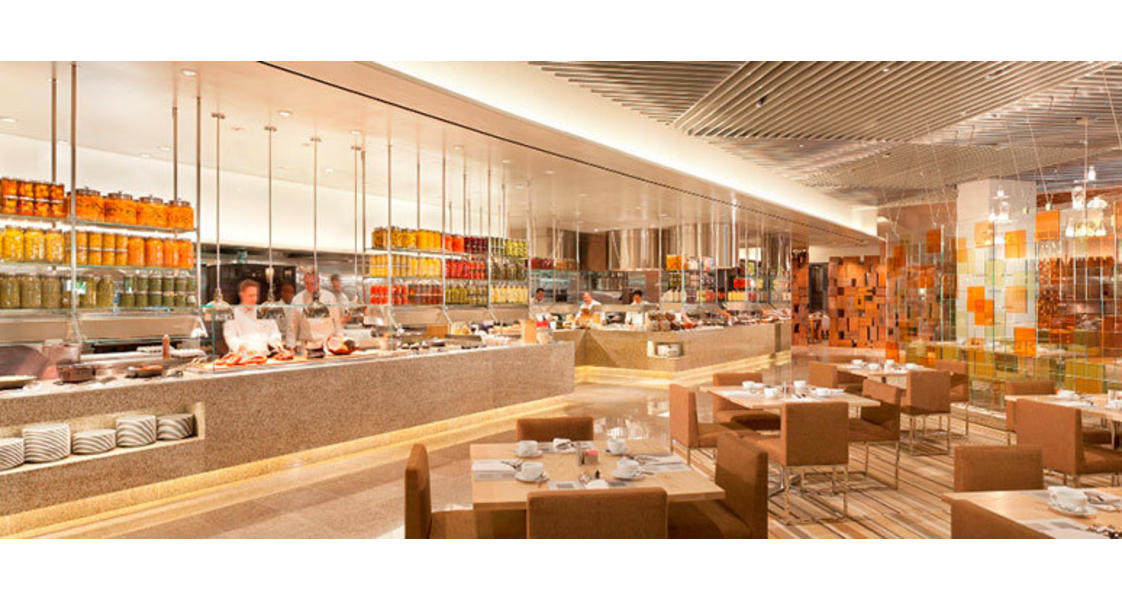

In [ ]:
#!pip install vaderSentiment
import pandas as pd
import re
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [94]:
df = pd.read_csv('restaurant.csv')

In [96]:
df.tail()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,"Best buffet ever! Irma was great, served us be...",2019-11-17 20:39:36
10413,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,Hollllllyyyy moleyyyy! \n\nThis buffet was one...,2019-11-12 02:23:07
10414,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,The selection is amazing and all the food is e...,2019-12-12 03:27:22
10415,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,One of the best buffets I've had in Vegas. My ...,2019-11-01 21:00:51
10416,3220316,mMa_YQNBJfuh_Nw_x81jlw,GsALS1y9wJoBRJTEzJiISg,RESDUcs7fIiihp38-d6_6g,4,1,1,1,I got a chance to go to the Bacchanal Buffett ...,2019-11-30 22:36:56


In [ ]:
bacchanal_data = df[['text']]

In [ ]:
def clean_text(text):
    # Karakterlerin, sayıların ve noktalamanın temizlenmesi
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\n', '', text)
    text = text.lower()
    return text

In [ ]:
bacchanal_data['cleaned_reviews'] = bacchanal_data['text'].apply(clean_text)

<ipython-input-7-4db1b3955245>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bacchanal_data['cleaned_reviews'] = bacchanal_data['text'].apply(clean_text)


In [ ]:
bacchanal_data

,text,cleaned_reviews
0,After getting food poisoning at the Palms hote...,after getting food poisoning at the palms hote...
1,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",a feast worthy of godsbaccarnal buffet in caes...
2,The crab legs are better than the ones at Wick...,the crab legs are better than the ones at wick...
3,Not worth it! Too salty food and expensive! Th...,not worth it too salty food and expensive this...
4,I would give this infinite stars if I could. M...,i would give this infinite stars if i could my...
...,...,...
10412,"Best buffet ever! Irma was great, served us be...",best buffet ever irma was great served us bett...
10413,Hollllllyyyy moleyyyy! \n\nThis buffet was one...,hollllllyyyy moleyyyy this buffet was one for ...
10414,The selection is amazing and all the food is e...,the selection is amazing and all the food is e...
10415,One of the best buffets I've had in Vegas. My ...,one of the best buffets ive had in vegas my on...


In [ ]:
bacchanal_data

,text,cleaned_reviews
0,After getting food poisoning at the Palms hote...,after getting food poisoning at the palms hote...
1,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",a feast worthy of godsbaccarnal buffet in caes...
2,The crab legs are better than the ones at Wick...,the crab legs are better than the ones at wick...
3,Not worth it! Too salty food and expensive! Th...,not worth it too salty food and expensive this...
4,I would give this infinite stars if I could. M...,i would give this infinite stars if i could my...
...,...,...
10412,"Best buffet ever! Irma was great, served us be...",best buffet ever irma was great served us bett...
10413,Hollllllyyyy moleyyyy! \n\nThis buffet was one...,hollllllyyyy moleyyyy this buffet was one for ...
10414,The selection is amazing and all the food is e...,the selection is amazing and all the food is e...
10415,One of the best buffets I've had in Vegas. My ...,one of the best buffets ive had in vegas my on...


In [ ]:
bacchanal_data

,text,cleaned_reviews,language
0,After getting food poisoning at the Palms hote...,after getting food poisoning at the palms hote...,en
1,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",a feast worthy of godsbaccarnal buffet in caes...,en
2,The crab legs are better than the ones at Wick...,the crab legs are better than the ones at wick...,en
3,Not worth it! Too salty food and expensive! Th...,not worth it too salty food and expensive this...,en
4,I would give this infinite stars if I could. M...,i would give this infinite stars if i could my...,en
...,...,...,...
10412,"Best buffet ever! Irma was great, served us be...",best buffet ever irma was great served us bett...,en
10413,Hollllllyyyy moleyyyy! \n\nThis buffet was one...,hollllllyyyy moleyyyy this buffet was one for ...,en
10414,The selection is amazing and all the food is e...,the selection is amazing and all the food is e...,en
10415,One of the best buffets I've had in Vegas. My ...,one of the best buffets ive had in vegas my on...,en


In [ ]:
10417-10374

43

In [ ]:
analyzer = SentimentIntensityAnalyzer()
bacchanal_data['sentiment'] = bacchanal_data['cleaned_reviews'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

<ipython-input-14-53f16be19c49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bacchanal_data['sentiment'] = bacchanal_data['cleaned_reviews'].apply(lambda x: analyzer.polarity_scores(x)['compound'])


In [ ]:
bacchanal_data['sentiment']

,sentiment
0,0.9864
1,0.9976
2,-0.6628
3,-0.1695
4,0.9325
...,...
10412,0.9042
10413,0.9524
10414,0.9565
10415,0.5719


In [ ]:
def sentiment_category(sentiment_score):
    if sentiment_score >= 0.2:
        return 'Positive'
    elif sentiment_score <= -0.2:
        return 'Negative'
    else:
        return 'Neutral'

In [ ]:
bacchanal_data['sentiment_category'] = bacchanal_data['sentiment'].apply(sentiment_category)

<ipython-input-17-14868faa5e84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bacchanal_data['sentiment_category'] = bacchanal_data['sentiment'].apply(sentiment_category)


In [ ]:
bacchanal_data['sentiment_category']


,sentiment_category
0,Positive
1,Positive
2,Negative
3,Neutral
4,Positive
...,...
10412,Positive
10413,Positive
10414,Positive
10415,Positive


In [ ]:
bacchanal_data['sentiment_category'].value_counts()

,count
sentiment_category,
Positive,8892
Negative,1028
Neutral,454


In [ ]:
df['stars'].value_counts()

,count
stars,
5,4247
4,2636
3,1561
1,1056
2,917


In [ ]:
4247+2636

6883

In [ ]:
bacchanal_data

,text,cleaned_reviews,language,sentiment,sentiment_category
0,After getting food poisoning at the Palms hote...,after getting food poisoning at the palms hote...,en,0.9864,Positive
1,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",a feast worthy of godsbaccarnal buffet in caes...,en,0.9976,Positive
2,The crab legs are better than the ones at Wick...,the crab legs are better than the ones at wick...,en,-0.6628,Negative
3,Not worth it! Too salty food and expensive! Th...,not worth it too salty food and expensive this...,en,-0.1695,Neutral
4,I would give this infinite stars if I could. M...,i would give this infinite stars if i could my...,en,0.9325,Positive
...,...,...,...,...,...
10412,"Best buffet ever! Irma was great, served us be...",best buffet ever irma was great served us bett...,en,0.9042,Positive
10413,Hollllllyyyy moleyyyy! \n\nThis buffet was one...,hollllllyyyy moleyyyy this buffet was one for ...,en,0.9524,Positive
10414,The selection is amazing and all the food is e...,the selection is amazing and all the food is e...,en,0.9565,Positive
10415,One of the best buffets I've had in Vegas. My ...,one of the best buffets ive had in vegas my on...,en,0.5719,Positive


In [ ]:
import matplotlib.pyplot as plt


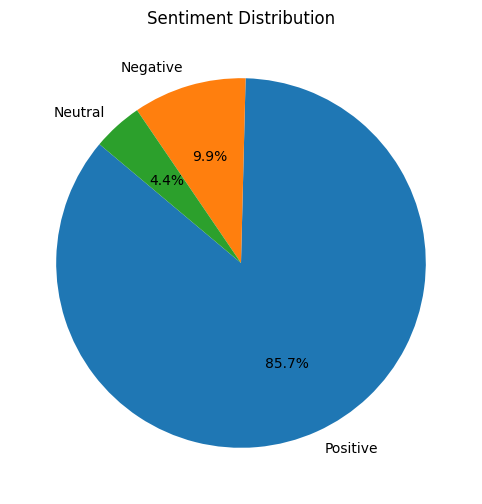

In [ ]:
import matplotlib.pyplot as plt

sentiment_counts = bacchanal_data['sentiment_category'].value_counts() # 3 farklı datayı al

# pie chart yap
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.show()

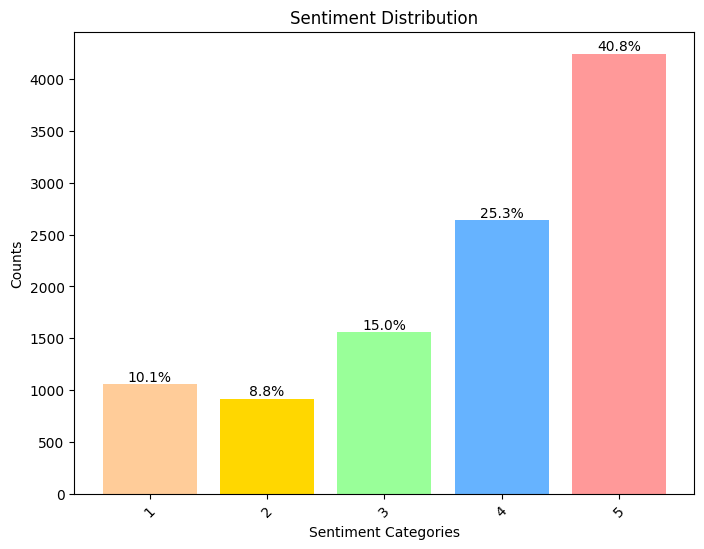

In [ ]:
df1 = pd.read_csv('restaurant.csv')

stars_sentiment_counts = df1['stars'].value_counts() # 5 farklı datayı al

total_counts = stars_sentiment_counts.sum()

colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700']

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(stars_sentiment_counts.index, stars_sentiment_counts.values,color=colors)

# Add percentage labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    percentage = (yval / total_counts) * 100  # Calculate percentage
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{percentage:.1f}%',
             ha='center', va='bottom')  # Center the percentage text above the bar

plt.xlabel('Sentiment Categories')  # Label for the x-axis
plt.ylabel('Counts')                 # Label for the y-axis
plt.title('Sentiment Distribution')  # Title of the bar chart
plt.xticks(rotation=45)              # Rotate x-axis labels if necessary
plt.show()

In [ ]:
#!pip install textblob

In [ ]:
#!pip install nltk

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
def analyze_textblob(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply the function to the 'text' column
bacchanal_data[['polarity', 'subjectivity']] = bacchanal_data['text'].apply(analyze_textblob).apply(pd.Series)

# Display the updated DataFrame with sentiment analysis results
print(bacchanal_data[['text', 'polarity', 'subjectivity']])

                                                    text  polarity  \
0      After getting food poisoning at the Palms hote...  0.371429   
1      "A feast worthy of Gods"\n\nBaccarnal Buffet i...  0.219409   
2      The crab legs are better than the ones at Wick... -0.134722   
3      Not worth it! Too salty food and expensive! Th... -0.484375   
4      I would give this infinite stars if I could. M...  0.362500   
...                                                  ...       ...   
10412  Best buffet ever! Irma was great, served us be...  0.526172   
10413  Hollllllyyyy moleyyyy! \n\nThis buffet was one...  0.231503   
10414  The selection is amazing and all the food is e...  0.480000   
10415  One of the best buffets I've had in Vegas. My ...  0.185185   
10416  I got a chance to go to the Bacchanal Buffett ...  0.312500   

       subjectivity  
0          0.605702  
1          0.537292  
2          0.731944  
3          0.400000  
4          0.725000  
...             ...  
10412

<ipython-input-47-98e95244f499>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bacchanal_data[['polarity', 'subjectivity']] = bacchanal_data['text'].apply(analyze_textblob).apply(pd.Series)
<ipython-input-47-98e95244f499>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bacchanal_data[['polarity', 'subjectivity']] = bacchanal_data['text'].apply(analyze_textblob).apply(pd.Series)


In [ ]:
bacchanal_data['text']

,text
0,After getting food poisoning at the Palms hote...
1,"""A feast worthy of Gods""\n\nBaccarnal Buffet i..."
2,The crab legs are better than the ones at Wick...
3,Not worth it! Too salty food and expensive! Th...
4,I would give this infinite stars if I could. M...
...,...
10412,"Best buffet ever! Irma was great, served us be..."
10413,Hollllllyyyy moleyyyy! \n\nThis buffet was one...
10414,The selection is amazing and all the food is e...
10415,One of the best buffets I've had in Vegas. My ...


In [ ]:
import pandas as pd
import string
from nltk.corpus import stopwords
import re

In [ ]:
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import pandas as pd
import string
import re

In [ ]:
stop_words = set(stopwords.words('english'))

# Temizleme işlemi hepsi temizlendi
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[1-9]', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.replace('\n', ' ')
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text


bacchanal_data['cleaned_text_1'] = bacchanal_data['text'].apply(clean_text)

# Display the cleaned DataFrame
print(bacchanal_data)

                                                    text  \
0      After getting food poisoning at the Palms hote...   
1      "A feast worthy of Gods"\n\nBaccarnal Buffet i...   
2      The crab legs are better than the ones at Wick...   
3      Not worth it! Too salty food and expensive! Th...   
4      I would give this infinite stars if I could. M...   
...                                                  ...   
10412  Best buffet ever! Irma was great, served us be...   
10413  Hollllllyyyy moleyyyy! \n\nThis buffet was one...   
10414  The selection is amazing and all the food is e...   
10415  One of the best buffets I've had in Vegas. My ...   
10416  I got a chance to go to the Bacchanal Buffett ...   

                                         cleaned_reviews language  sentiment  \
0      after getting food poisoning at the palms hote...       en     0.9864   
1      a feast worthy of godsbaccarnal buffet in caes...       en     0.9976   
2      the crab legs are better than th

<ipython-input-58-439e0c8bef8e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bacchanal_data['cleaned_text_1'] = bacchanal_data['text'].apply(clean_text)


In [ ]:
bacchanal_data

,text,cleaned_reviews,language,sentiment,sentiment_category,polarity,subjectivity,cleaned_text_1
0,After getting food poisoning at the Palms hote...,after getting food poisoning at the palms hote...,en,0.9864,Positive,0.348197,0.611273,getting food poisoning palms hotel scared eat ...
1,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",a feast worthy of godsbaccarnal buffet in caes...,en,0.9976,Positive,0.222532,0.538945,feast worthy gods baccarnal buffet caesar pala...
2,The crab legs are better than the ones at Wick...,the crab legs are better than the ones at wick...,en,-0.6628,Negative,-0.134722,0.731944,crab legs better ones wicked spoon huge prawns...
3,Not worth it! Too salty food and expensive! Th...,not worth it too salty food and expensive this...,en,-0.1695,Neutral,-0.100000,0.400000,worth salty food expensive furst kast visit bu...
4,I would give this infinite stars if I could. M...,i would give this infinite stars if i could my...,en,0.9325,Positive,0.362500,0.725000,would give infinite stars could family diamond...
...,...,...,...,...,...,...,...,...
10412,"Best buffet ever! Irma was great, served us be...",best buffet ever irma was great served us bett...,en,0.9042,Positive,0.766667,0.516667,best buffet ever irma great served us better p...
10413,Hollllllyyyy moleyyyy! \n\nThis buffet was one...,hollllllyyyy moleyyyy this buffet was one for ...,en,0.9524,Positive,0.274074,0.574074,hollllllyyyy moleyyyy buffet one books iv neve...
10414,The selection is amazing and all the food is e...,the selection is amazing and all the food is e...,en,0.9565,Positive,0.480000,0.630000,selection amazing food excellently prepared es...
10415,One of the best buffets I've had in Vegas. My ...,one of the best buffets ive had in vegas my on...,en,0.5719,Positive,0.208333,0.475000,one best buffets ive vegas visit unfortunately...


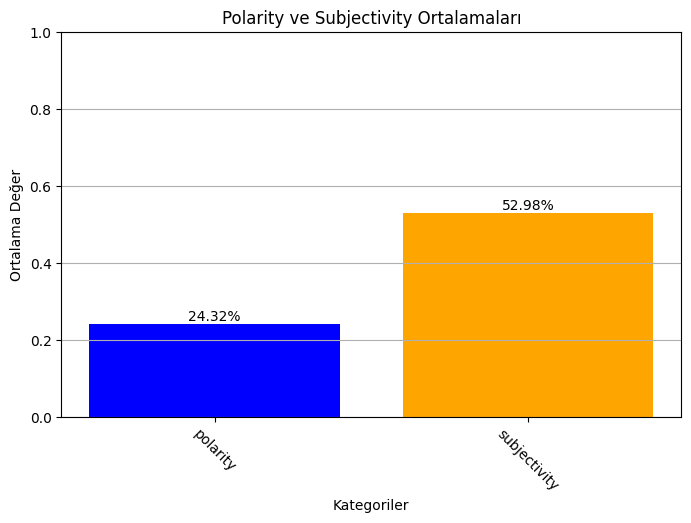

In [ ]:
mean_values = bacchanal_data[['polarity', 'subjectivity']].mean()

# Görselleştirme
plt.figure(figsize=(8, 5))
bars = plt.bar(mean_values.index, mean_values, color=['blue', 'orange'])

# Yüzde değerlerini ekle
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2%}', ha='center', va='bottom')

plt.title('Polarity ve Subjectivity Ortalamaları')
plt.xlabel('Kategoriler')
plt.ylabel('Ortalama Değer')
plt.xticks(rotation=-45)
plt.ylim(0, 1)  # Değerlerin 0 ile 1 arasında olduğunu varsayarak
plt.grid(axis='y')
plt.show()

In [88]:
df02 = pd.read_csv("restaurant.csv")
stop_words = set(stopwords.words('english'))

# Temizleme işlemi hepsi temizlendi
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[1-9]', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.replace('\n', ' ')
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text


df02['cleaned_text_2'] = df02['text'].apply(clean_text)

# Display the cleaned DataFrame
print(df02)

       Unnamed: 0               review_id                 user_id  \
0         2370338  _WTGv5XnA-qb_XD1D7Z0jg  6PgdGb3HrZdsfl2GiULo8w   
1         2370357  JlNnsvMPLK_1-X2hwzK24w  IS9yw8P2uAPBX6FNLLX4KA   
2         2370373  hBkoWffORRb6aqKhC_Li2A  uZdFsE_aHbFBChgN6Xa8tw   
3         2370411  rbkxvrgZg5kdCL2a66QYmA  8ZWJNAEWsymXDzKx3B0tTQ   
4         2370500  5tw_pedoHVi9bgeiBNsISg  E0sm4Ve7ifanFYeQMcV8Eg   
...           ...                     ...                     ...   
10412     3220114  46xWDTFPZI9u6waHm78EKw  CT57mpNepL9q9sTYFqRbLQ   
10413     3220152  gbBau-2wy3_kNr2y6dEa1Q  c-j3TV1F8rI6bQUD6nqGPQ   
10414     3220255  2wFmrsm8j1cyyG-DoMqKUw  kbylx63ynkXL8YBJzVfNnQ   
10415     3220306  75nzyA96_BgVrpflweAA3w  6rEG-G4syq5IvWti4tyPXA   
10416     3220316  mMa_YQNBJfuh_Nw_x81jlw  GsALS1y9wJoBRJTEzJiISg   

                  business_id  stars  useful  funny  cool  \
0      RESDUcs7fIiihp38-d6_6g      5       0      1     0   
1      RESDUcs7fIiihp38-d6_6g      4      39     

In [ ]:
df_stars_5 = df02[df02['stars'] == 5][['cleaned_text_2', 'stars']]
df_stars_1 = df02[df02['stars'] == 1][['cleaned_text_2', 'stars']]

In [80]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


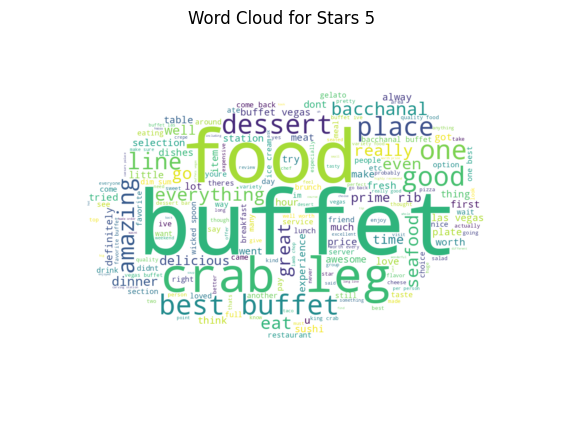

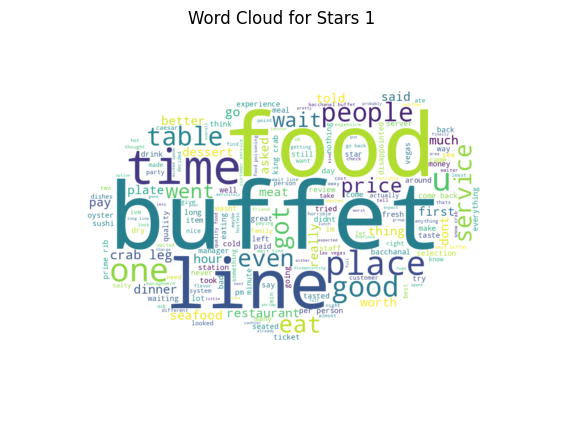

In [90]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# stars değeri 5 olanları al
df_stars_5 = df02[df02['stars'] == 5]['cleaned_text_2']
# stars değeri 1 olanları al
df_stars_1 = df02[df02['stars'] == 1]['cleaned_text_2']

# Kelime bulutu oluşturma fonksiyonu
def create_word_cloud(text, title, mask_image):
    mask = np.array(Image.open(mask_image))  # Resmi oku

    wordcloud = WordCloud(width=800, height=400, background_color='white', mask=mask, contour_color='black', contour_width=0).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Arka plan resmi
mask_image_path = 'cloud.png'

# Stars 5 olanların metinlerini birleştir ve kelime bulutu oluştur
combined_text_stars_5 = ' '.join(df_stars_5)
create_word_cloud(combined_text_stars_5, 'Word Cloud for Stars 5', mask_image_path)

# Stars 1 olanların metinlerini birleştir ve kelime bulutu oluştur
combined_text_stars_1 = ' '.join(df_stars_1)
create_word_cloud(combined_text_stars_1, 'Word Cloud for Stars 1', mask_image_path)

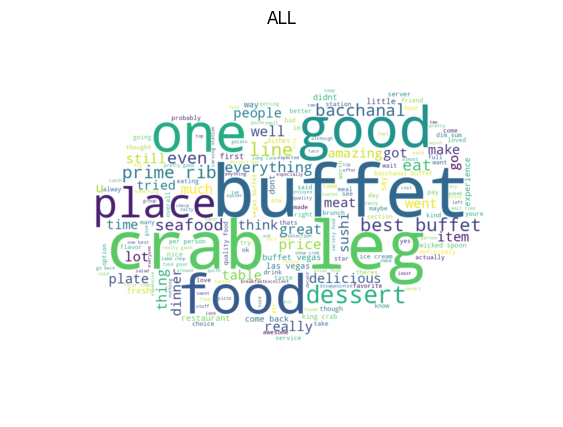

In [92]:
df_all = df02['cleaned_text_2']
combined_text_stars_6 = ' '.join(df_all)
create_word_cloud(combined_text_stars_6, 'ALL', mask_image_path)

In [97]:
df02

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,cleaned_text_2
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18,getting food poisoning palms hotel scared eat ...
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50,feast worthy gods baccarnal buffet caesar pala...
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09,crab legs better ones wicked spoon huge prawns...
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29,worth salty food expensive furst kast visit bu...
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17,would give infinite stars could family diamond...
...,...,...,...,...,...,...,...,...,...,...,...
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,"Best buffet ever! Irma was great, served us be...",2019-11-17 20:39:36,best buffet ever irma great served us better p...
10413,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,Hollllllyyyy moleyyyy! \n\nThis buffet was one...,2019-11-12 02:23:07,hollllllyyyy moleyyyy buffet one books iv neve...
10414,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,The selection is amazing and all the food is e...,2019-12-12 03:27:22,selection amazing food excellently prepared es...
10415,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,One of the best buffets I've had in Vegas. My ...,2019-11-01 21:00:51,one best buffets ive vegas visit unfortunately...
